# Config

In [5]:
import torch

In [6]:
epochs = 1

data_augmentation = 0 # 0 -> None, 1-3 -> Data Augmentation

use_gpu = True
pretrained_backbone = True

num_classes = 50
train_batch_size = 8

train_size = 0.7 # -> 70% Train, 30% Test

checkpoints_path='./checkpoints'
checkpoint_prefix='retinanet_base_'

In [7]:
lr_scheduler = None
#lr_scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=3, gamma=0.1)

# Data Augmentation

In [8]:
import torchvision

In [9]:
transforms = []

#### Type 0: None

In [10]:
Transform = None
transforms.append(Transform)

#### Type 1: Jitter and Flip

In [7]:
Jitter_Transform = torchvision.transforms.ColorJitter(0.4, 0.4, 0.4)
Flip_Tranform = torchvision.transforms.RandomHorizontalFlip(p=0.5)

Transform = torchvision.transforms.Compose([Jitter_Transform,
                                            Flip_Tranform])

transforms.append(Transform)

#### Type 2:

### Select

In [8]:
Transform = transforms[data_augmentation]

# Dataset

In [11]:
from utils import dataset

In [12]:
train_set = dataset.ClothingDataset('../data/Annotations/', 
                                    train='train', 
                                    transforms=Transform)

Dropped 556 images with box area 0


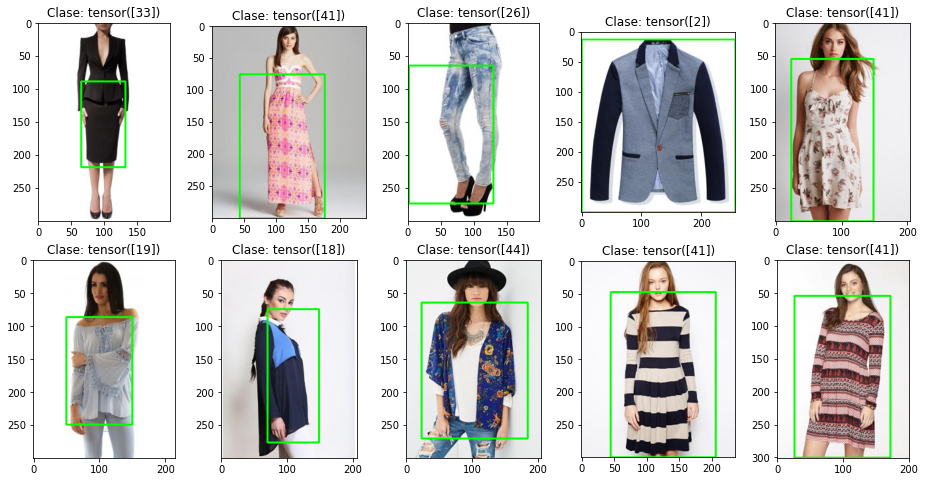

In [11]:
train_set.plot()

# Models: Faster R-CNN

In [12]:
import torchvision

### Training

In [13]:
from utils import trainer

In [14]:
torch.cuda.empty_cache()

In [15]:
model = torchvision.models.detection.retinanet_resnet50_fpn(num_classes=num_classes, 
                                                            pretrained_backbone=pretrained_backbone)

In [16]:
train = trainer.Trainer(model=model,
                        dataset=train_set,
                        n_classes=num_classes, 
                        train_batch_size=train_batch_size, 
                        train_size=train_size, 
                        lr_scheduler=lr_scheduler, 
                        use_gpu=use_gpu)

In [17]:
train_loss, validation_loss = train.train(epochs=epochs, 
                                          checkpoints_path=checkpoints_path, 
                                          checkpoint_prefix=checkpoint_prefix)

/home/delas/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch: [0]  [   0/1177]  eta: 0:09:55  lr: 0.001000  loss: 3.9249 (3.9249)  classification: 2.0139 (2.0139)  bbox_regression: 1.9110 (1.9110)  time: 0.5059  data: 0.0133  max mem: 5377
Epoch: [0]  [ 100/1177]  eta: 0:07:57  lr: 0.001000  loss: 3.1849 (5.6800)  classification: 1.5132 (4.2865)  bbox_regression: 1.4723 (1.3934)  time: 0.4425  data: 0.0088  max mem: 5760
Epoch: [0]  [ 200/1177]  eta: 0:07:13  lr: 0.001000  loss: 21.6839 (67.0050)  classification: 19.8562 (65.3696)  bbox_regression: 1.1500 (1.6354)  time: 0.4429  data: 0.0086  max mem: 5760
Epoch: [0]  [ 300/1177]  eta: 0:06:30  lr: 0.001000  loss: 2.7639 (46.1780)  classification: 1.3331 (44.6711)  bbox_regression: 1.2185 (1.5069)  time: 0.4430  data: 0.0089  max mem: 5760
Epoch: [0]  [ 400/1177]  eta: 0:05:45  lr: 0.001000  loss: 4.0524 (35.5338)  classification: 3.2533 (34.1086)  bbox_regression: 1.1713 (1.4252)  time: 0.4426  data: 0.0086  max mem: 5760
Epoch: [0]  [ 500/1177]  eta: 0:05:00  lr: 0.001000  loss: 2.2372 (

Test:  [3500/4034]  eta: 0:00:17  loss: 2.4046 (2.5909)  classification: 1.4261 (1.4023)  bbox_regression: 0.8437 (1.1887)  time: 0.0319  data: 0.0011  max mem: 5760
Test:  [3600/4034]  eta: 0:00:13  loss: 2.2369 (2.5925)  classification: 1.2880 (1.4022)  bbox_regression: 0.7145 (1.1903)  time: 0.0319  data: 0.0010  max mem: 5760
Test:  [3700/4034]  eta: 0:00:10  loss: 2.2450 (2.5943)  classification: 1.3636 (1.4028)  bbox_regression: 0.8473 (1.1916)  time: 0.0320  data: 0.0011  max mem: 5760
Test:  [3800/4034]  eta: 0:00:07  loss: 2.2628 (2.5946)  classification: 1.3038 (1.4031)  bbox_regression: 0.9398 (1.1915)  time: 0.0320  data: 0.0011  max mem: 5760
Test:  [3900/4034]  eta: 0:00:04  loss: 2.2442 (2.5969)  classification: 1.3495 (1.4024)  bbox_regression: 0.7548 (1.1945)  time: 0.0319  data: 0.0011  max mem: 5760
Test:  [4000/4034]  eta: 0:00:01  loss: 2.2435 (2.5971)  classification: 1.3773 (1.4034)  bbox_regression: 0.9093 (1.1936)  time: 0.0319  data: 0.0011  max mem: 5760
Test

#### Loss

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
train_loss_classifier = train_loss['loss_classifier']
train_loss_box = train_loss['loss_box']
validation_loss_classifier = validation_loss['loss_classifier']
validation_loss_box = validation_loss['loss_box']

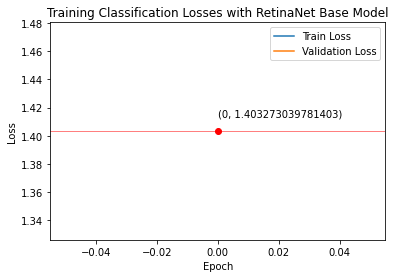

In [29]:
plt.title('Training Classification Losses with RetinaNet Base Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
clip_max = np.max(validation_loss_classifier)
plt.plot(np.clip(train_loss_classifier, 0, clip_max))
plt.plot(np.clip(validation_loss_classifier, 0, clip_max))
plt.plot(np.argmin(validation_loss_classifier), np.min(validation_loss_classifier),'ro') 
plt.text(np.argmin(validation_loss_classifier), np.min(validation_loss_classifier)+0.01,
         '({}, {})'.format(np.argmin(validation_loss_classifier), np.min(validation_loss_classifier)))
plt.axhline(y=np.min(validation_loss_classifier), color='r', linestyle='-', linewidth=.5)
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

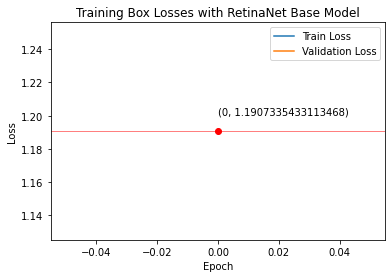

In [30]:
plt.title('Training Box Losses with RetinaNet Base Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
clip_max = np.max(validation_loss_box)
plt.plot(np.clip(train_loss_box, 0, clip_max))
plt.plot(np.clip(validation_loss_box, 0, clip_max))
plt.plot(np.argmin(validation_loss_box), np.min(validation_loss_box),'ro') 
plt.text(np.argmin(validation_loss_box), np.min(validation_loss_box)+0.01,
         '({}, {})'.format(np.argmin(validation_loss_box), np.min(validation_loss_box)))
plt.axhline(y=np.min(validation_loss_box), color='r', linestyle='-', linewidth=.5)
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

### RetinaNet con ResNet-50

In [22]:
#model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

#in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
#model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [23]:
# Jitter_Transform = torchvision.transforms.ColorJitter(0.4, 0.4, 0.4)
# Flip_Tranform = torchvision.transforms.RandomHorizontalFlip(p=0.5)
# Normalize_Transform = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# Resize = torchvision.transforms.Resize((160, 160))

# Transform = torchvision.transforms.Compose([self.Jitter_Transform,
#                                             self.Flip_Tranform,
#                                             self.Normalize_Transform,
#                                             self.Resize])